In [107]:
# ! pip install turicreate

In [1]:
import turicreate as tc

In [8]:
sales = tc.SFrame('/content/drive/MyDrive/Colab Notebooks/Predicting house prices assignment/home_data.sframe')

In [9]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650.0,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000.0,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000.0,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080.0,1.0,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930.0,1.0,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819.0,2.0,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711.0,1.0,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470.0,1.0,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560.0,2.0,0


In [10]:
sales.show()

Materializing SFrame

Warning: Skipping column 'date'. Unable to show columns of type 'datetime'; only [int, float, str] can be shown.

Further warnings of unsupported type will be suppressed.

In [14]:
tc.show(sales[1:5000]['sqft_living'],sales[1:5000]['price'])

Materializing X axis SArray

Materializing Y axis SArray

# Simple regression model that predicts price from square feet

In [11]:
training_set, test_set = sales.random_split(.8,seed=0)

In [13]:
sqft_model = tc.linear_regression.create(training_set,target='price',features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.003965     | 4347071.457926     | 1995062.154762       | 263462.477227                   | 252903.967767                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

#Evaluate the Model

In [17]:
print(test_set['price'].mean())

543054.0425632533


In [18]:
print(sqft_model.evaluate(test_set))

{'max_error': 4141523.700733066, 'rmse': 255188.45244867713}


In [19]:
sqft_model.coefficients

name,index,value,stderr
(intercept),None,-47024.94210612017,5060.657747739002
sqft_living,None,282.15381611456564,2.226527610144321


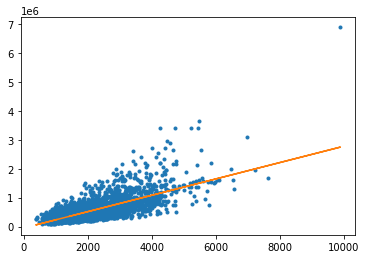

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(test_set['sqft_living'],test_set['price'],'.',
        test_set['sqft_living'],sqft_model.predict(test_set),'-')

# Explore other features of the data

In [22]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [23]:
sales[my_features].show()

Materializing SFrame

In [25]:
tc.show(sales['zipcode'],sales['price'])

Materializing X axis SArray

Materializing Y axis SArray

As can be seen, houses with zip = "98039" have the highest average price.

# Build a model with these additional features

In [26]:
my_features_model = tc.linear_regression.create(training_set,target='price',features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.074329     | 4090848.258351     | 2981894.441989       | 186637.529059                   | 233466.240680                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

# Compare simple model with more complex one

In [27]:
print (my_features)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


In [28]:
print (sqft_model.evaluate(test_set))
print (my_features_model.evaluate(test_set))

{'max_error': 4141523.700733066, 'rmse': 255188.45244867713}
{'max_error': 3164485.9239192964, 'rmse': 180407.41016286635}


# Apply learned models to make predictions

In [29]:
house1 = sales[sales['id']=='5309101200']

In [30]:
house1

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000.0 |   4.0    |    2.25   |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    2400.0   |  5350.0  |  1.5   |     0      |  0   |     4     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1460.0   |     940.0     |  1929.0  |     0.0      |  98117  | 47.67632376 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.37010126 |     1250.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [31]:
print (house1['price'])

[620000.0, ... ]


In [32]:
print (sqft_model.predict(house1))

[630144.2165688374]


In [33]:
print (my_features_model.predict(house1))

[724463.8163175633]


## Prediction for a second house, a fancier one

In [34]:
house2 = sales[sales['id']=='1925069082']

In [35]:
house2

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000.0 |   5.0    |    4.25   |
+------------+---------------------------+-----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    4640.0   | 22703.0  |  2.0   |     1      |  4   |     5     |  8.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   2860.0   |     1780.0    |  1952.0  |     0.0      |  98052  | 47.63925783 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.09722322 |     3140.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [36]:
print (sqft_model.predict(house2))

[1262168.7646654644]


In [37]:
print (my_features_model.predict(house2))

[1224817.3762638413]


## Prediction for a super fancy home

In [38]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Residence_of_Bill_Gates.jpg">

In [40]:
print (my_features_model.predict(tc.SFrame(bill_gates)))

[14935308.294206124]


# Quiz Questions

## Question 1

**Selection and summary statistics:** We found the zip code with the highest average house price. What is the average house price of that zip code?

In [58]:
zip = '98039'
print(sales.filter_by(zip, 'zipcode')['price'].mean())

2160606.6


## Question 2

**Filtering data:** What fraction of the houses have living space between 2000 sq.ft. and 4000 sq.ft.?

In [69]:
fraction = len(sales[(sales['sqft_living']>2000) & (sales['sqft_living']<4000)]) / len(sales)
print("The fraction is: ", "{:.2f}".format(fraction))

The fraction is:  0.42


## Question 3

**Building a regression model with several more features:** What is the difference in RMSE between the model trained with my_features and the one trained with advanced_features?

In [74]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

advanced_features_model = tc.linear_regression.create(training_set,target='price',features=advanced_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 87

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.073261     | 4319837.416980     | 1416483.050674       | 163222.634712                   | 146372.393238                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [106]:
my_features_RMSE = my_features_model.evaluate(test_set, 'rmse')
advanced_features_RMSE = advanced_features_model.evaluate(test_set, 'rmse')
print("my_features_RMSE is: ",my_features_RMSE, "\n",
      "advanced_features_RMSE is: ", advanced_features_RMSE)
print('\n===========================\n')

# To get the dict values use the List comprehension method:
rmse_diff = round(float([x for x in my_features_RMSE.values()][0]) - float([x for x in advanced_features_RMSE.values()][0]))

print("the difference in RMSE between the model trained with my_features and the one trained with advanced_features is: ", rmse_diff)

my_features_RMSE is:  {'rmse': 180407.41016286635} 
 advanced_features_RMSE is:  {'rmse': 155521.83024501152}


the difference in RMSE between the model trained with my_features and the one trained with advanced_features is:  24886
